# Week 3 Homework

1. Filter the data to include only weekdays (Monday to Friday) and
plot a line graph showing the pedestrian counts for each day of the
week.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

----- Write your code below this after running above above code-----------

2. Track pedestrian counts on the Brooklyn Bridge for the year 2019
and analyze how different weather conditions influence pedestrian
activity in that year. Sort the pedestrian count data by weather
summary to identify any correlations( with a correlation matrix)
between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a
numerical feature(Pedestrians) and a non-numerical feature(Weather
Summary). In such instances we use Encoding. Each weather condition
can be encoded as numbers( 0,1,2..). This technique is called One-hot
encoding.

-Correlation matrices may not always be the most suitable
visualization method for relationships involving categorical
datapoints, nonetheless this was given as a question to help you
understand the concept better.

3. Implement a custom function to categorize time of day into morning,
afternoon, evening, and night, and create a new column in the
DataFrame to store these categories. Use this new column to analyze
pedestrian activity patterns throughout the day.


C:\Users\User\AppData\Local\Temp\ipykernel_51040\2457602509.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


day_name
Tuesday      2328
Monday       2304
Wednesday    2280
Thursday     2280
Friday       2280
Name: count, dtype: int64


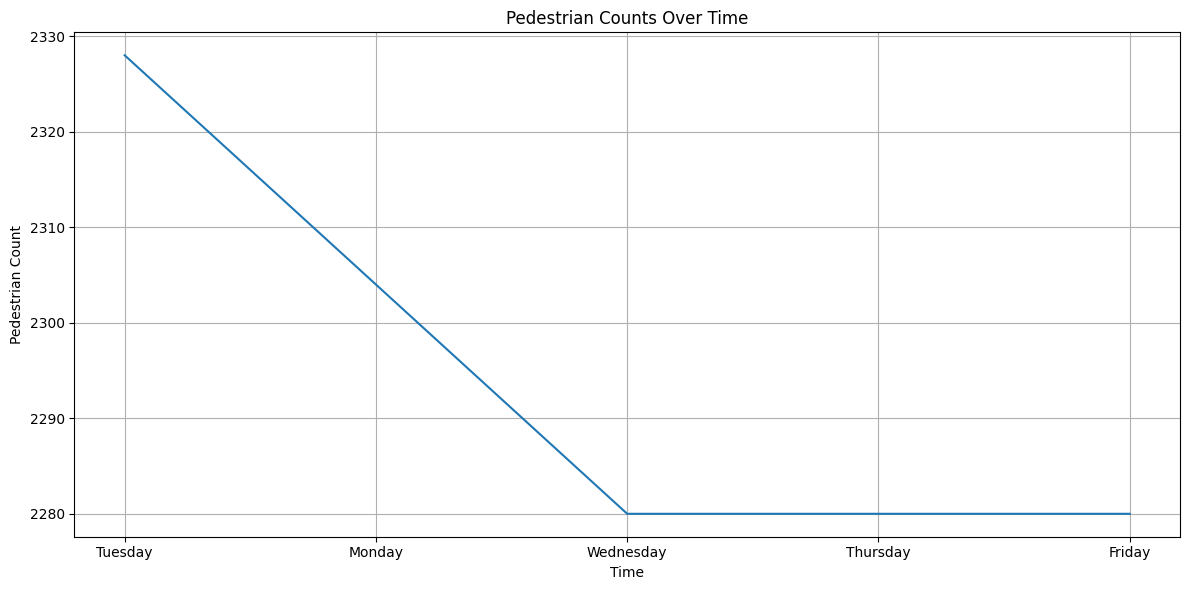

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

#Read the dataset

df = pd.read_csv(r'C:\Users\User\Downloads\Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv')


## Question 1
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['day_name'] = df['hour_beginning'].dt.day_name()

days = ['Monday', 'Tuesday','Wednesday','Thursday','Friday']
fil_df = df[df['day_name'].isin(days)]

counts=fil_df['day_name'].value_counts()

plt.figure(figsize=(12, 6))
plt.plot(counts)
plt.title('Pedestrian Counts Over Days')
plt.xlabel('Day')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
##Question 2
fil_df_2 = df[(df['location'] == 'Brooklyn Bridge') & (df['hour_beginning'].dt.year == 2019)]

encode = range(fil_df_2['weather_summary'].shape[0])
df_code = pd.get_dummies(fil_df_2['weather_summary'], prefix='Weather')

df_all = pd.concat([fil_df_2, df_code], axis=1)

corr_matrix = df_all[['Pedestrians'] + list(df_code.columns)].corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Weather Conditions and Pedestrian Count')
plt.tight_layout()
plt.show()



In [39]:
fil_df_2 = df[(df['location'] == 'Brooklyn Bridge') & (df['hour_beginning'].dt.year == 2019)]

encode = range(fil_df_2['weather_summary'].shape[0])
df_code = pd.get_dummies(fil_df_2['weather_summary'], prefix='Weather')

df_all = pd.concat([fil_df_2, df_code], axis=1)

corr_matrix = df_all[['Pedestrians'] + list(df_code.columns)].corr()
print(corr_matrix)

                             Pedestrians  Weather_clear-day  \
Pedestrians                     1.000000           0.339758   
Weather_clear-day               0.339758           1.000000   
Weather_clear-night            -0.377297          -0.227660   
Weather_cloudy                 -0.081255          -0.224004   
Weather_fog                    -0.026457          -0.022002   
Weather_partly-cloudy-day       0.497867          -0.220884   
Weather_partly-cloudy-night    -0.282081          -0.175456   
Weather_rain                   -0.138581          -0.119645   
Weather_sleet                  -0.017091          -0.013257   
Weather_snow                   -0.034052          -0.028943   
Weather_wind                   -0.000170          -0.009372   

                             Weather_clear-night  Weather_cloudy  Weather_fog  \
Pedestrians                            -0.377297       -0.081255    -0.026457   
Weather_clear-day                      -0.227660       -0.224004    -0.022002   


In [34]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_name
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday


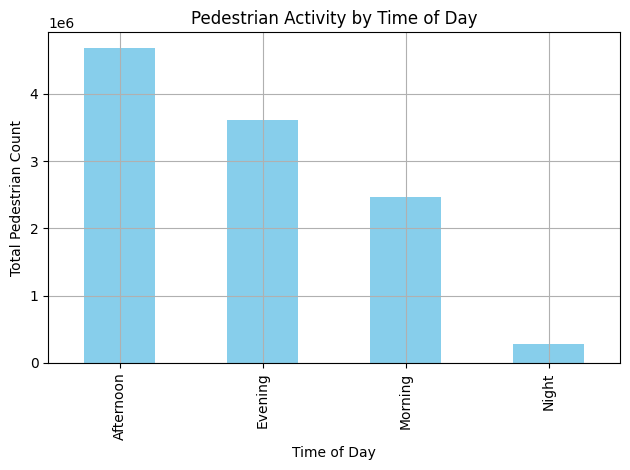

In [43]:
# Function to categorize time of day
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Hour'] = pd.to_datetime(df['hour_beginning'], format='%H:%M:%S').dt.hour
df['TimeOfDay'] = df['Hour'].apply(categorize_time_of_day)

time_of_day_activity = df.groupby('TimeOfDay')['Pedestrians'].sum()

# Plot pedestrian activity by time of day
time_of_day_activity.plot(kind='bar', color='skyblue')
plt.title('Pedestrian Activity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()